In [3]:
#連結雲端 因bids檔案太大無法直接匯入
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


使用**邏輯回歸（Logistic Regression）模型**

它是一種非常簡單且常用的二元分類模型。在許多情況下，儘管邏輯回歸模型很簡單，但其效果與更複雜的模型相當。不過，請注意，由於邏輯回歸模型是線性的，因此可能無法捕獲到更複雜的模型可以捕獲的一些非線性模式。

In [6]:

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 讀取數據
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_bids = pd.read_csv('/content/drive/My Drive/bids.csv')

# 計算每個投標者的出價數量，獨特的拍賣數，設備數，商品數和國家數
num_bids_per_bidder = df_bids.groupby('bidder_id').size()
num_auctions_per_bidder = df_bids.groupby('bidder_id')['auction'].nunique()
num_devices_per_bidder = df_bids.groupby('bidder_id')['device'].nunique()
num_merchandise_per_bidder = df_bids.groupby('bidder_id')['merchandise'].nunique()
num_countries_per_bidder = df_bids.groupby('bidder_id')['country'].nunique()

# 創建一個新的 DataFrame 用於特徵
df_features = pd.DataFrame({
    'num_bids_per_bidder': num_bids_per_bidder,
    'num_auctions_per_bidder': num_auctions_per_bidder,
    'num_devices_per_bidder': num_devices_per_bidder,
    'num_merchandise_per_bidder': num_merchandise_per_bidder,
    'num_countries_per_bidder': num_countries_per_bidder,
})

# 重置 DataFrame 的索引
df_features.reset_index(inplace=True)

# 將特徵與訓練集和測試集合併
df_train = pd.merge(df_train, df_features, on='bidder_id', how='left')
df_test = pd.merge(df_test, df_features, on='bidder_id', how='left')

# 用 0 填充缺失值
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# 創建特徵 (X) 和目標變量 (y)
X_train = df_train.drop(columns=['bidder_id', 'payment_account', 'address', 'outcome'])
y_train = df_train['outcome']

# 初始化模型
model = LogisticRegression(random_state=42)


# 在整個訓練集上訓練模型
model.fit(X_train, y_train)

# 創建測試集的特徵
X_test = df_test.drop(columns=['bidder_id', 'payment_account', 'address'])

# 預測測試集的概率
y_test_proba = model.predict_proba(X_test)[:, 1]

# 創建提交的 DataFrame
df_submission = df_test[['bidder_id']].copy()
df_submission['prediction'] = y_test_proba

# 將提交的 DataFrame 寫入 CSV 文件
df_submission.to_csv('Logistic_Regression.csv', index=False)

print("預測已保存到 'Logistic_Regression.csv'")



預測已保存到 'Logistic_Regression.csv'


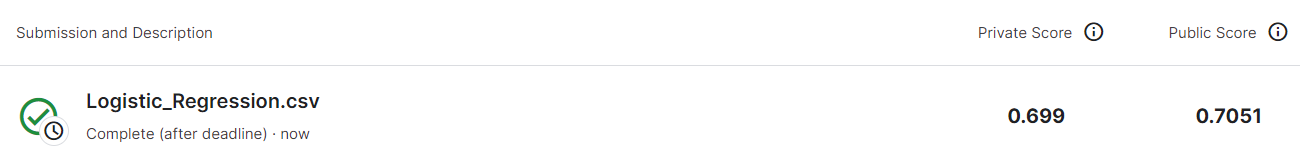